In [40]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [43]:
df.shape

(2035, 8)

In [44]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [45]:
df.info()     #dataframe has no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [63]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [55]:
df1 = df[['Date','Open','Close']]
df1.set_index('Date',inplace=True)
df1.head()


,Open,Close
Date,,
2018-09-28,234.05,233.75
2018-09-27,234.55,233.25
2018-09-26,240.00,234.25
2018-09-25,233.30,236.10
2018-09-24,233.55,233.30


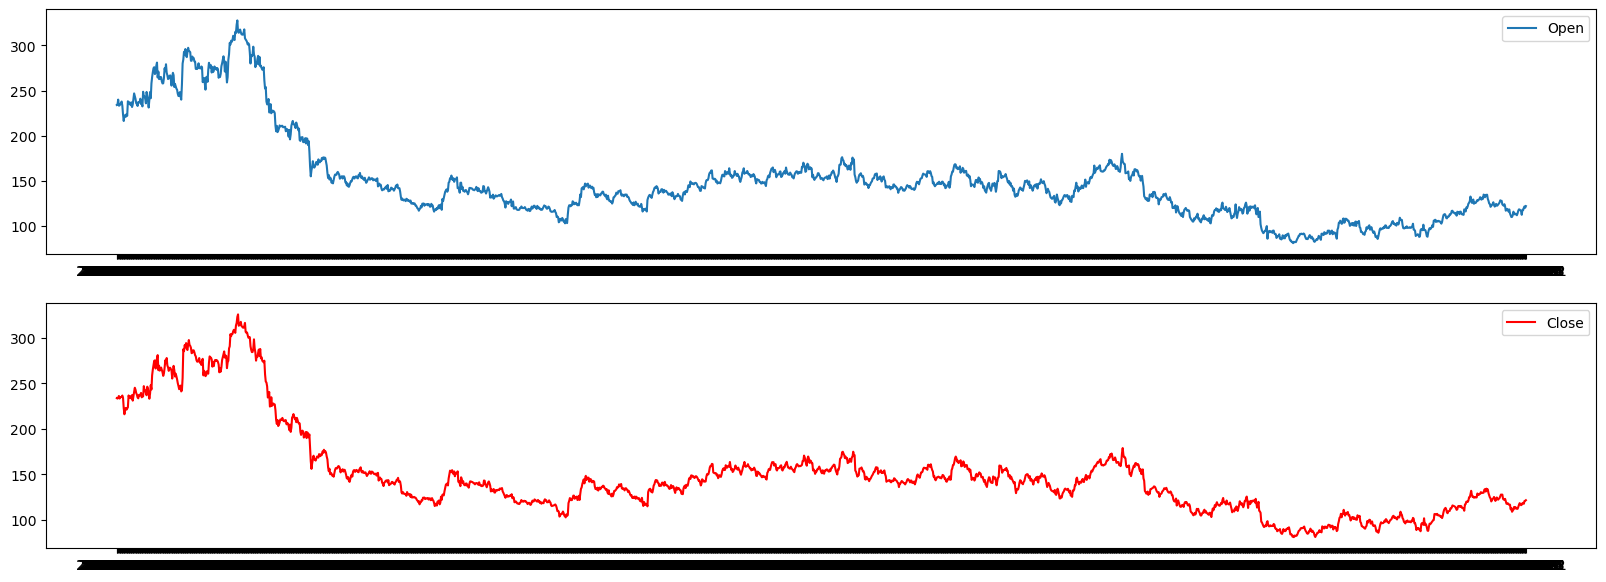

In [61]:
fig,ax = plt.subplots(2,1, figsize=(20,7))
ax[0].plot(df1['Open'],label='Open')
ax[0].legend()
ax[1].plot(df1['Close'],label='Close',color='red')
ax[1].legend()

In [65]:
#df1.shape

(2035, 2)

In [66]:
training_size = round(len(df1) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1628

In [67]:
train_data = df1[:training_size]
test_data  = df1[training_size:]

train_data.shape, test_data.shape

((1628, 2), (407, 2))

In [68]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [77]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [70]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((1578, 50, 2), (1578, 2), (357, 50, 2), (357, 2))

# Creating LSTM 

In [78]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [84]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (50, 2)))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_3 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.fit(train_seq, train_label, epochs=200,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/200
50/50 [==============================] - 3s 60ms/step - loss: 14951.4502 - mean_absolute_error: 113.1311 - val_loss: 3423.2539 - val_mean_absolute_error: 56.8231
Epoch 2/200
50/50 [==============================] - 3s 59ms/step - loss: 14448.3516 - mean_absolute_error: 110.8884 - val_loss: 3175.1880 - val_mean_absolute_error: 54.5970
Epoch 3/200
50/50 [==============================] - 3s 58ms/step - loss: 13960.8291 - mean_absolute_error: 108.6591 - val_loss: 2938.4402 - val_mean_absolute_error: 52.3843
Epoch 4/200
50/50 [==============================] - 3s 59ms/step - loss: 13487.7617 - mean_absolute_error: 106.4487 - val_loss: 2712.9963 - val_mean_absolute_error: 50.1867
Epoch 5/200
50/50 [==============================] - 3s 58ms/step - loss: 13027.4082 - mean_absolute_error: 104.2798 - val_loss: 2500.9629 - val_mean_absolute_error: 48.0282
Epoch 6/200
50/50 [==============================] - 3s 58ms/step - loss: 12581.3516 - mean_absolute_error: 102.1141 - val_loss: 2

In [99]:
test_predicted = model.predict(test_seq)
test_predicted

12/12 [==============================] - 0s 17ms/step


array([[105.72746 , 104.76065 ],
       [105.81988 , 104.85368 ],
       [105.528   , 104.56143 ],
       [105.514694, 104.551636],
       [105.438446, 104.47599 ],
       [105.45592 , 104.49448 ],
       [105.63107 , 104.66894 ],
       [105.41806 , 104.45417 ],
       [105.4511  , 104.49019 ],
       [105.33292 , 104.3713  ],
       [105.50595 , 104.54609 ],
       [105.44319 , 104.48161 ],
       [105.51503 , 104.55446 ],
       [105.526375, 104.565186],
       [105.55747 , 104.59695 ],
       [105.35557 , 104.39471 ],
       [105.151566, 104.19403 ],
       [105.080574, 104.125854],
       [105.058   , 104.103516],
       [104.95183 , 103.99811 ],
       [104.948   , 103.99623 ],
       [104.85765 , 103.90579 ],
       [104.906235, 103.956085],
       [104.85379 , 103.9028  ],
       [104.85013 , 103.90027 ],
       [104.815636, 103.865715],
       [104.883575, 103.934235],
       [104.97357 , 104.02349 ],
       [105.023094, 104.07188 ],
       [105.10498 , 104.15291 ],
       [10